In this notebook we will investigate weather centrality trading works.

In [282]:
import pandas as pd

# Specify the file path
file_path = 'CentralityData1.xlsx'

# Read the Excel file
df = pd.read_excel(file_path)
df

df = df.set_index('Unnamed: 0')

df = df.rename_axis('Date')
df.head()


,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLC
Date,,,,,,,,,,
2018-12-31,0.461461,0.015715,0.167934,0.389741,0.328264,0.433057,0.328264,0.077192,0.256092,0.363473
2019-01-31,0.430764,0.071763,0.194731,0.412543,0.272217,0.371445,0.350135,0.205588,0.331109,0.338545
2019-02-28,0.453413,0.053343,0.211860,0.378407,0.287695,0.329882,0.407780,0.291002,0.272329,0.294575
2019-03-31,0.421705,0.027866,0.377552,0.284708,0.144690,0.420600,0.367695,0.151818,0.354007,0.341138
2019-04-30,0.362043,0.125904,0.379552,0.379552,0.122463,0.379073,0.379073,0.020338,0.362043,0.362043


In [283]:



df_high = df.apply(lambda row: row == row.max(), axis=1).astype(int)

df_high.head()

def adjust_pick_values(row):
    count = row.sum()
    return row / count if count > 0 else row

df_high_adjusted = df_high.apply(adjust_pick_values, axis=1)
df_high_adjusted.head()





,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLC
Date,,,,,,,,,,
2018-12-31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-02-28,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-03-31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-04-30,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0


Text(0, 0.5, 'Count')

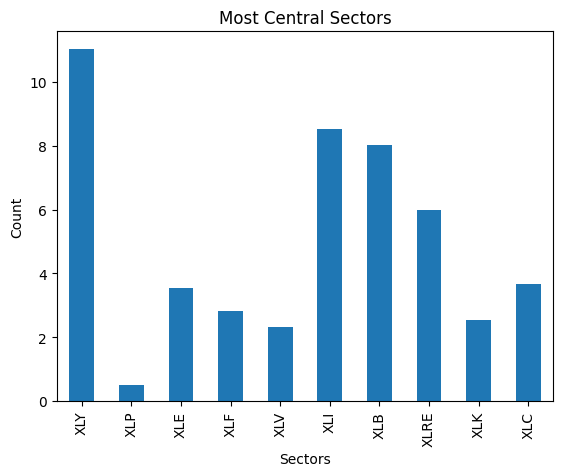

In [284]:


column_sums = df_high_adjusted.sum()

ax = column_sums.plot(kind='bar')
ax.set_title('Most Central Sectors')
ax.set_xlabel('Sectors')
ax.set_ylabel('Count')


Text(0, 0.5, 'Count')

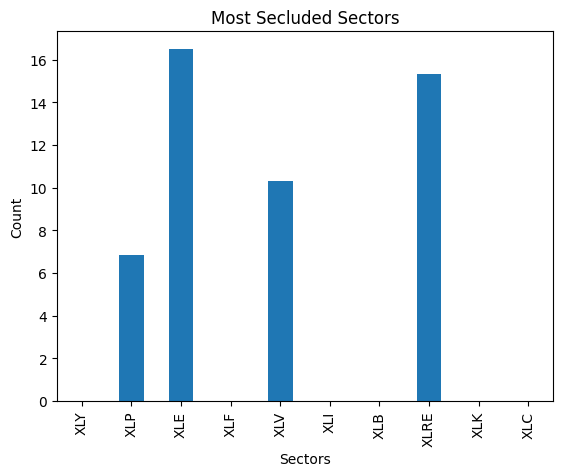

In [280]:

df_low = df.eq(df.min(axis=1), axis=0).astype(int)

df_low_adjusted = df_low.apply(adjust_pick_values, axis=1)
df_low_adjusted.head()
column_sums = df_low_adjusted.sum()
ax = column_sums.plot(kind='bar')
ax.set_title('Most Secluded Sectors')
ax.set_xlabel('Sectors')
ax.set_ylabel('Count')



In [294]:
import yfinance as yf


tickers = ['XLY', 'XLP', 'XLE', 'XLF', 'XLV', 'XLI', 'XLB', 'XLRE', 'XLK', 'XLC']

# Download historical data for the tickers
data = yf.download(tickers, start='2018-11-30', end='2022-12-31')

# Calculate the monthly returns
monthly_returns = data['Adj Close'].resample('M').ffill().pct_change().dropna()

monthly_returns.head()


picked_returns = monthly_returns * df_high_adjusted

picked_returns.head()

picked_returns.sum()

sum_of_each_value = picked_returns.sum().sum()
sum_of_each_value


[*********************100%%**********************]  10 of 10 completed


0.4051743410268895

We see that this strategy has a return of 0.40517323106052944

In [295]:
picked_returns = monthly_returns * df_low_adjusted
picked_returns.head()
sum_of_each_value = picked_returns.sum().sum()
sum_of_each_value

1.3616741756623487

At first we think these returns are amazing but keep in mind this is all driven by energy and is likely just an outlier.

<Axes: >

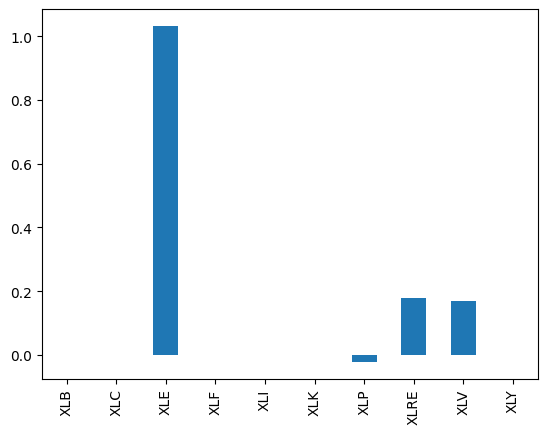

In [296]:
picked_returns.sum().plot(kind='bar')


In [276]:
sum_of_each_value_without_xle = picked_returns.sum().drop('XLE')
total_sum = sum_of_each_value_without_xle.sum()
total_sum



0.3294655589448184

Once we take into account energy we get a return in line with our expectations. Lastly we consider a purely random agent.

In [286]:
df_random = pd.DataFrame(0.1, index=df_high_adjusted.index, columns=df_high_adjusted.columns)
df_random.head()

,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLC
Date,,,,,,,,,,
2018-12-31,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2019-01-31,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2019-02-28,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2019-03-31,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2019-04-30,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1


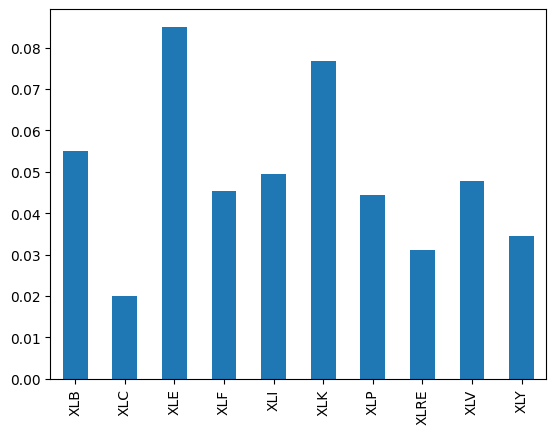

In [297]:

picked_returns = monthly_returns * df_random

picked_returns.head()
picked_returns.sum().plot(kind='bar')
sum_of_each_value = picked_returns.sum().sum()

In [293]:
sum_of_each_value_without_xle = picked_returns.sum().drop('XLE')
total_sum = sum_of_each_value_without_xle.sum()
total_sum



0.4042715372672127

We see that the strategy performs just the same as a completely random agent